In [4]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_curve, auc

# 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# CARGA DE DATAFRAME Y EXPLORACIÓ INICIAL

#### CARGA DATAFRAME

In [7]:
artists_billboard = pd.read_csv("/Users/pere amat/CE/PIA/CLASSIFICACIÓ/ENTREGABLES/ejer1/artists_billboard_fix3.csv")

#### visualitació dataframe

In [9]:
artists_billboard.head(10)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0
7,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0
8,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0
9,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,0.0


El DataFrame ens permet tenir una visió clara i estructurada de totes les cançons, i a partir d'aquesta estructura, podem realitzar diferents tipus d'anàlisis i visualitzacions.

#### ¿Cuántos alcanzaron el número 1?

In [12]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

#### VISUALITZACIÓ TIPUS DE DADES

In [14]:
artists_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   durationSeg     635 non-null    float64
 9   top             635 non-null    int64  
 10  anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


Com podem veure hi han moltes variables de tipus objecte cosa que ens pot ocasionar problemes perque els models siguin mes eficients, tambè podem observar que no hi han valors nuls

## VISUALIZACIÓN CAMPOS ÚNICOS

La visualització dels valors únics de cada variable en un DataFrame és fonamental per entendre millor el conjunt de dades, ja que ens ajuda a identificar quin tipus de dades tenim (numèriques, categòriques, etc.) i ens orienta sobre el mètode de codificació que caldrà utilitzar abans d'entrenar els models

In [18]:
artists_billboard['mood'].unique()

array(['Brooding', 'Energizing', 'Excited', 'Yearning', 'Upbeat', 'Cool',
       'Urgent', 'Aggressive', 'Sophisticated', 'Defiant', 'Sensual',
       'Empowering', 'Gritty', 'Romantic', 'Rowdy', 'Other', 'Fiery',
       'Sentimental', 'Easygoing', 'Stirring', 'Melancholy', 'Peaceful',
       'Lively'], dtype=object)

In [19]:
artists_billboard['tempo'].unique()

array(['Medium Tempo', 'Slow Tempo', 'Fast Tempo'], dtype=object)

In [20]:
artists_billboard['genre'].unique()

array(['Traditional', 'Pop', 'Urban', 'Alternative & Punk', 'Electronica',
       'Other', 'Soundtrack', 'Rock', 'Jazz'], dtype=object)

In [21]:
artists_billboard['artist_type'].unique()

array(['Male', 'Female', 'Mixed'], dtype=object)

### Visualicemos los Atributos de entrada

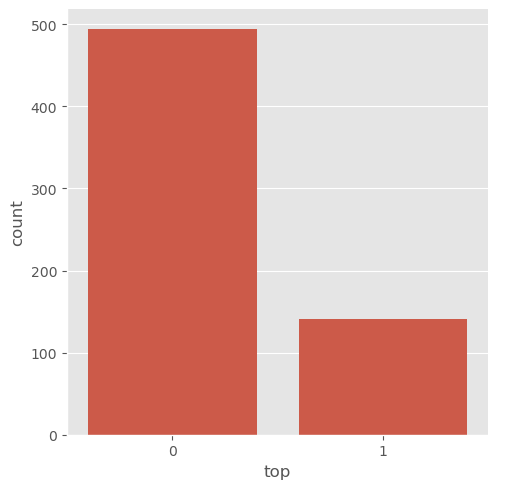

In [23]:
sns.catplot(x='top', data=artists_billboard, kind="count")
plt.show()

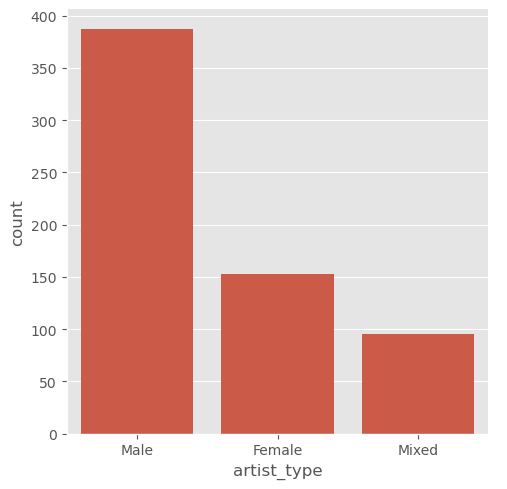

In [24]:
sns.catplot(x='artist_type', data=artists_billboard, kind="count")
plt.show()

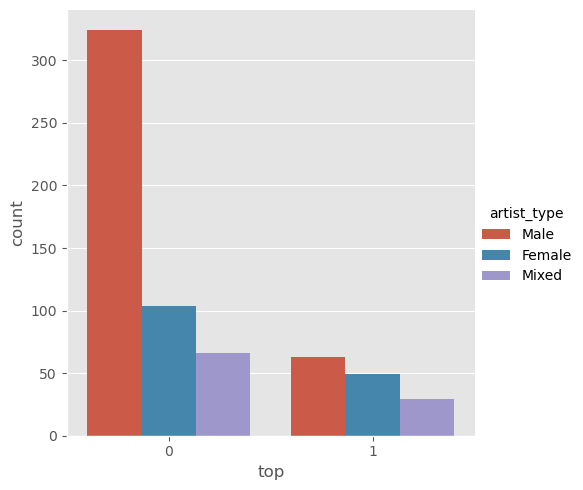

In [25]:
sns.catplot(x='top', data=artists_billboard, hue='artist_type', kind="count")
plt.show()


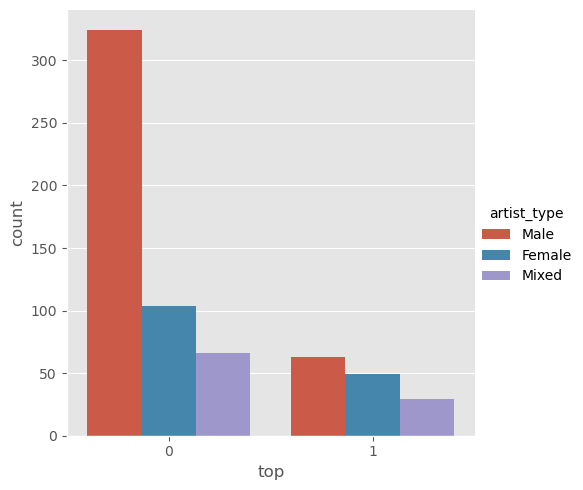

In [26]:
# Crear el gráfico
sns.catplot(x='top', data=artists_billboard, hue='artist_type', kind="count")
plt.show()

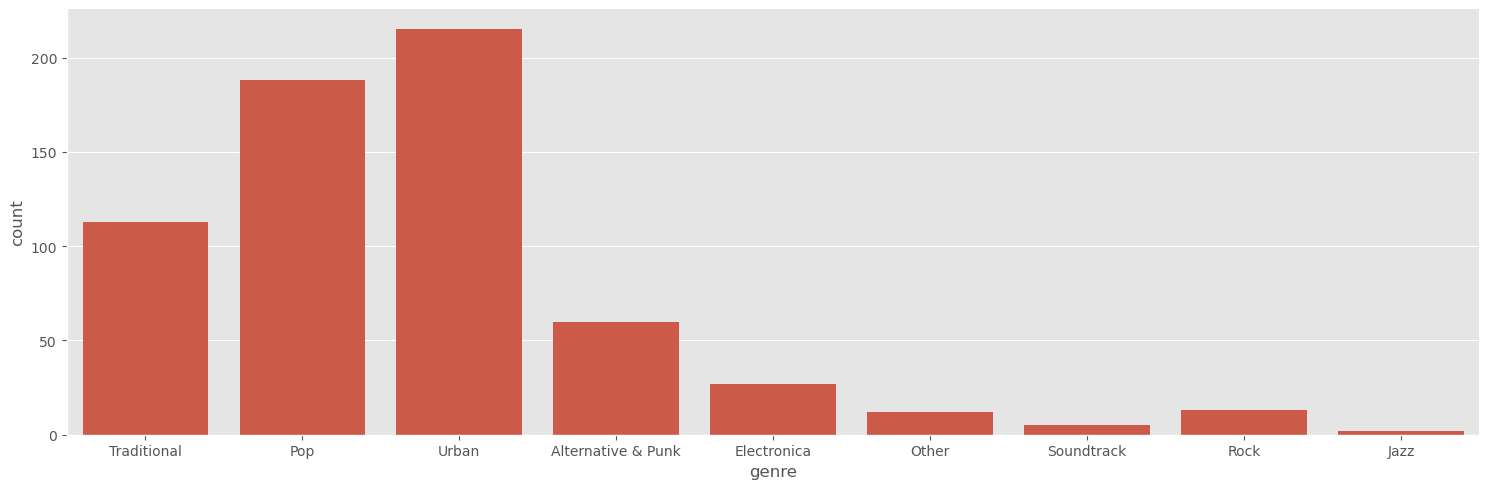

In [27]:
# Crear el gráfico usando catplot
sns.catplot(x='genre', data=artists_billboard, kind="count", aspect=3)
plt.show()

## CAMPOS

#### ID:
#### TITTLE: titulo canción
#### Artist: artista
#### MOOD: Vibraciones de la canción
 ['Brooding', 'Energizing', 'Excited', 'Yearning', 'Upbeat', 'Cool',  'Urgent', 'Aggressive', 'Sophisticated', 'Defiant', 'Sensual'  'Empowering', 'Gritty', 'Romantic', 'Rowdy', 'Other', 'Fiery    'Sentimental', 'Easygoing', 'Stirring', 'Melancholy', 'Peacefu    'Live
#### TEMPO
 ['Medium Tempo', 'Slow Tempo', 'Fast Tempo']

#### GENRE 
 ['Traditional', 'Pop', 'Urban', 'Alternative & Punk', 'Electronica', 'Other', 'Soundtrack', 'Rock', 'Jazz'

#### ARTIST_TYPE:
 ['Male', 'Female', 'Mixed']
#### chart_date
#### DURATIONSEG: Duración canción 
#### anioNacimiento
]IDAD

#### Visualització min, max, percentils, std

In [30]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


És important visualitzar la desviació estàndard, la mitjana i el valor màxim per entendre la distribució de les dades. Aquestes mètriques ens ajuden a identificar possibles valors erronis.

Per exemple, en la durada de les cançons, si el màxim és 6840 segons (més de 1 hora i mitja), és clarament un valor erroni, ja que les cançons normalment duren entre 2 i 10 minuts. També, en el camp de l'any de naixement, es poden veure valors com 0, que no té sentit, ja que l'any de naixement no pot ser tan antic ni zero. Aquesta anomalia pot afectar l'anàlisi i cal corregir-la abans de continuar.

### Visualizacion valores atipicos canciones

In [33]:
artists_billboard[artists_billboard['durationSeg'] > 400]


,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
7,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0
45,45,Baby Don't Lie,GWEN STEFANI,Cool,Medium Tempo,Pop,Female,20141108,1619.0,0,1969.0
73,73,I Have Nothing,TESSANNE CHIN,Sentimental,Slow Tempo,Alternative & Punk,Mixed,20140104,4496.0,0,1986.0
109,109,Word Crimes,WEIRD AL YANKOVIC,Excited,Medium Tempo,Other,Male,20140802,568.0,0,1978.0
112,112,Lost Without U,CHRIS JAMISON & ADAM LEVINE,Sensual,Medium Tempo,Pop,Male,20150103,4150.0,0,1979.0
150,150,Grillz,"NELLY featuring PAUL WALL, ALI & GIPP",Cool,Medium Tempo,Urban,Male,20060121,701.0,1,1974.0
164,164,Odio,ROMEO SANTOS featuring DRAKE,Romantic,Medium Tempo,Traditional,Male,20140215,6743.0,0,1986.0
175,175,Grenade,BRUNO MARS,Brooding,Medium Tempo,Pop,Male,20110108,773.0,1,1985.0
238,238,Irresistible,FALL OUT BOY,Defiant,Medium Tempo,Alternative & Punk,Male,20150124,2040.0,0,1984.0
295,295,Work It,"MISSY ""MISDEMEANOR"" ELLIOTT",Energizing,Medium Tempo,Urban,Female,20150221,2836.0,0,1971.0


He observat que hi ha molts valors amb durades de cançons molt curtes i també diversos valors erronis en la columna durationSeg. Com que el temps de durada no és una variable tan rellevant per a l'anàlisi en aquest cas, he decidit prescindir-ne. Aquesta decisió em permetrà simplificar l'anàlisi i evitar la necessitat de revisar cada cançó de manera individual per identificar errors, centrant-me en les dades més importants.

## ELIMINACIÓ DE CAMPOS

En el DataFrame podem observar que hi ha diverses variables que no ens són útils per a l'anàlisi, ja que no aporten informació rellevant. A més, algunes de les columnes contenen dades errònies. Per tant, he decidit eliminar les següents columnes: id, anioNacimiento, durationSeg i chartdate, ja que no contribueixen a l'objectiu de l'anàlisi i en alguns casos contenen valors incorrectes.

In [37]:
artists_billboard2 = artists_billboard[['artist','mood', 'tempo','genre','artist_type','top'  ]].copy()

In [38]:
artists_billboard2.head()

,artist,mood,tempo,genre,artist_type,top
0,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,0
1,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,0
2,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,1
3,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,0
4,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,0


## Explorar y limpiar los datos

In [40]:
artists_billboard2.isnull().sum()

artist         0
mood           0
tempo          0
genre          0
artist_type    0
top            0
dtype: int64

### Verificacion duplicados o incosistencias



Moltes vegades és fàcil equivocar-se en introduir un camp, creant valors duplicats per errors tipogràfics. Per solucionar-ho, he utilitzat OpenRefine amb el mètode de clustering i Nearest Neighbor per unificar valors similars i corregir errors, millorant així la qualitat de les dades.

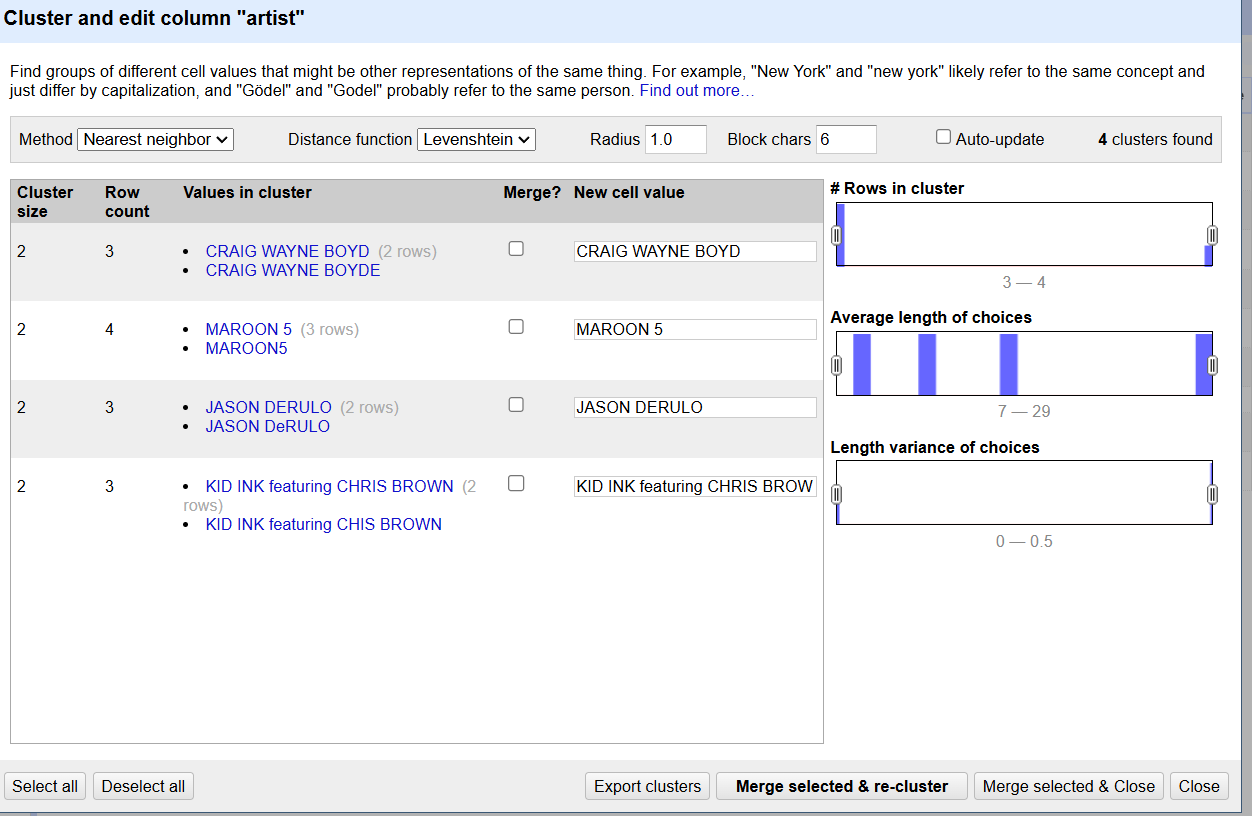

In [43]:
from IPython.display import Image

# Ruta de la imagen que quieres mostrar
image_path = '/Users/pere amat/CE/PIA/CLASSIFICACIÓ/ENTREGABLES/ejer1/openrefine.png'
artists_billboard3 = pd.read_csv("/Users/pere amat/CE/PIA/CLASSIFICACIÓ/ENTREGABLES/ejer1/artists-billboard-fix3-csv.csv")
artists_cartelera = artists_billboard3[['artist','mood', 'tempo','genre','artist_type','top'  ]].copy()
# Mostrar la imagen
Image(filename=image_path)



### Codificación Variables

##### codificació variable artist freq Encoding

In [46]:
artists_cartelera['artist_encoded'] = artists_cartelera['artist'].map(artists_cartelera['artist'].value_counts())

##### codificació variable mood amb freq Encoding

In [48]:
artists_cartelera['mood_encoded'] = artists_cartelera['mood'].map(artists_cartelera['mood'].value_counts())

##### codificació variable tempo amb Ordinal Encoding

In [50]:
artists_cartelera['tempo_encoded'] = artists_cartelera['tempo'].map({"Slow Tempo": 0, "Medium Tempo": 1, "Fast Tempo": 2})

##### Codificació 'genre' amb freq Encoding

In [52]:
artists_cartelera['genre_encoded'] = artists_cartelera['genre'].map(artists_cartelera['genre'].value_counts())

##### Codificació 'artist_type' amb Ordinal Encoding

In [54]:
artists_cartelera['artist_type_encoded'] = artists_cartelera['artist_type'].map({"Male": 0, "Female": 1, "Mixed": 2})

In [55]:
artists_cartelera.head(10)

,artist,mood,tempo,genre,artist_type,top,artist_encoded,mood_encoded,tempo_encoded,genre_encoded,artist_type_encoded
0,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,0,1,14,1,113,0
1,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,0,1,71,1,188,1
2,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,1,1,62,1,215,2
3,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,0,1,14,1,60,0
4,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,0,2,68,1,113,1
5,DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,0,2,12,1,113,0
6,BEYONCE,Cool,Slow Tempo,Urban,Female,1,6,78,0,215,1
7,RIXTON,Urgent,Fast Tempo,Pop,Male,0,1,30,2,188,0
8,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,0,1,11,1,215,1
9,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,0,1,68,1,60,0


##### Eliminar variables codificades

In [57]:
artists_cartelera = artists_cartelera.drop(columns=['artist','mood','tempo','genre','artist_type'])

In [58]:
artists_cartelera

,top,artist_encoded,mood_encoded,tempo_encoded,genre_encoded,artist_type_encoded
0,0,1,14,1,113,0
1,0,1,71,1,188,1
2,1,1,62,1,215,2
3,0,1,14,1,60,0
4,0,2,68,1,113,1
...,...,...,...,...,...,...
630,0,3,7,1,188,0
631,0,1,4,0,188,1
632,1,1,15,0,215,1
633,0,1,71,1,215,2


### Análisis exploratorio de datos (EDA)

top                    1.000000
artist_encoded         0.026871
mood_encoded           0.070514
tempo_encoded         -0.011749
genre_encoded          0.286788
artist_type_encoded    0.157899
Name: top, dtype: float64


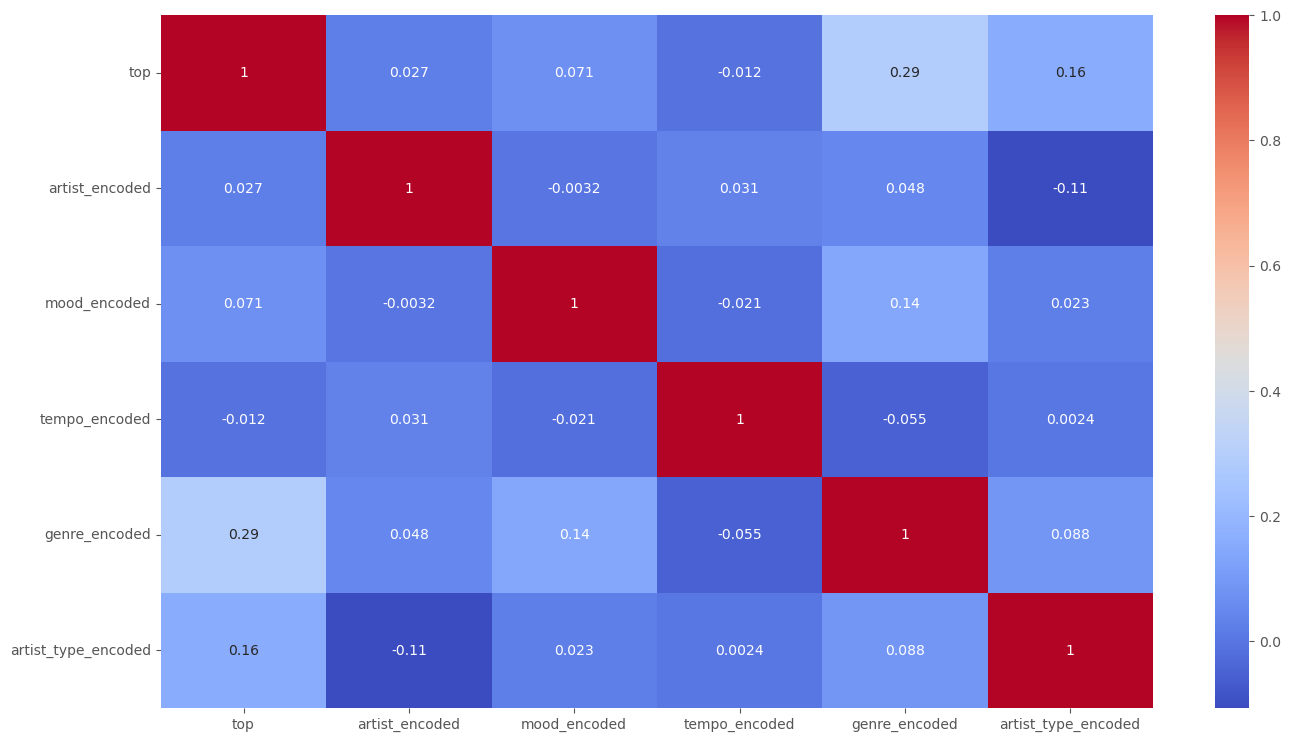

In [60]:
# Matriz de correlación
correlaciones = artists_cartelera.corr()
print(correlaciones['top'])  # Correlación de la variable faltante con otras

# Mapa de calor de correlación
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.show()


En aquest cas, només farem referència al apartat "top", que és la variable objectiu. Les correlacions més fortes són:

Gènere de la cançó amb una correlació de 0,287%, que és la més alta i positiva.
Quantitat d'artistes de la cançó (sexo) amb una correlació de 0,157%, també positiva però més dèbil.
A continuació, tenim altres correlacions més febles:

Mood amb una correlació positiva de 0,07%, però poc significativa.
Artist_encoded amb una correlació de 0,027%, també petita.
Finalment, Tempo mostra una correlació negativa de -0,011%, que indica una relació gairebé nul·la entre el tempo i la variable objectiu.

Podria ser que la codificación sea incorrecta y por eso las correlaciones no son las ideales.

# MODELS

## Arbre de decisió

###  Definir variables objectiu 


In [66]:
X = artists_cartelera.drop(['top'], axis=1)


y = artists_cartelera['top']

### Dividir les dades en conjunt de train i test 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 42)


### Dimensió 

In [70]:
X_train.shape, X_test.shape

((488, 5), (147, 5))

###  Definir models i parametres

In [72]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

### TRAIN MODEL

In [74]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

###  Predició

In [76]:
y_pred = dt_model.predict(X_test)

### METRIQUES classificació

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### ACCURACY,RECALL,PRECISIÓN,F1-SCORE

In [80]:
# Cálculo de las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Precisión: 0.6153846153846154
Recall: 0.2222222222222222
F1-Score: 0.32653061224489793
Accuracy: 0.7755102040816326


Tot i tenir un accuracy del 77%, el model no és eficaç, ja que quan prediu "1", només té un 60% de probabilitat d'encertar. El recall indica que el model falla sovint en identificar la classe "1", ja que s'equivoca més en la classe "0". Això vol dir que, tot i un accuracy decent, el model no està rendint bé per a la classe important.

#### MATRIU DE CONFUSIÓ

In [83]:
matriu_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", matriu_confusion)

Matriz de Confusión:
 [[106   5]
 [ 28   8]]


Com podem observar, el model és bastant efectiu a l'hora de predir la classe 0 (classe negativa), amb una alta accuracy en aquesta classe, però quan es tracta de la classe 1 (classe positiva), el percentatge d'encerts és molt baix.

#### Verificación Overfiting y Underfiting


In [86]:
# Predicción en el conjunto de entrenamiento
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Predicción en el conjunto de prueba
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.7971
Test Accuracy: 0.7755


Podria ser que el model estigues sobreajustat, pero com podem veure el canvi es de un 2% per tan no podem considerar que hi ha overfitting ni underfitting

## DECISION TREE 2

#### AJUSTE PARAMETROS CON GRID 

A continuació utilitzarem grid_search per buscar si optimitzant els parametres podem millorar el model per evitar que el recall sigui baix.

In [90]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [91]:
# Crear el modelo base de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

In [92]:

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [93]:

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [94]:

best_dt_model = grid_search.best_estimator_
# Realizar predicciones con el modelo optimizado
y_pred_optimized = best_dt_model.predict(X_test)

In [95]:
# Cálculo de las métricas
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
accuracy = accuracy_score(y_test, y_pred_optimized)

# Imprimir los resultados
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Precisión: 0.6
Recall: 0.25
F1-Score: 0.35294117647058826
Accuracy: 0.7755102040816326


In [96]:
matriu_confusion = confusion_matrix(y_test, y_pred_optimized)
print("Matriz de Confusión:\n", matriu_confusion)


Matriz de Confusión:
 [[105   6]
 [ 27   9]]


Els resultats obtinguts mostren que, tot i que l'accuracy és alta (77,53%), el recall és baix (25%), indicant que el model té dificultats per identificar les instàncies positives (classe 1). Això pot ser un problema si l'objectiu és detectar bé les instàncies de la classe positiva. El F1-Score també és baix (35%), reflectint que el model no troba un bon equilibri entre la precisió i el recall.

### Visualización decision tree

[Text(0.5, 0.875, 'x[3] <= 150.5\ngini = 0.338\nsamples = 488\nvalue = [383, 105]'),
 Text(0.25, 0.625, 'x[1] <= 69.5\ngini = 0.095\nsamples = 180\nvalue = [171, 9]'),
 Text(0.125, 0.375, 'x[0] <= 1.5\ngini = 0.046\nsamples = 126\nvalue = [123, 3]'),
 Text(0.0625, 0.125, 'gini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(0.375, 0.375, 'x[1] <= 83.0\ngini = 0.198\nsamples = 54\nvalue = [48, 6]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.087\nsamples = 44\nvalue = [42, 2]'),
 Text(0.75, 0.625, 'x[0] <= 3.5\ngini = 0.429\nsamples = 308\nvalue = [212, 96]'),
 Text(0.625, 0.375, 'x[1] <= 69.5\ngini = 0.407\nsamples = 239\nvalue = [171, 68]'),
 Text(0.5625, 0.125, 'gini = 0.339\nsamples = 134\nvalue = [105.0, 29.0]'),
 Text(0.6875, 0.125, 'gini = 0.467\nsamples = 105\nvalue = [66, 39]'),
 Text(0.875, 0.375, 'x[4] <= 0.5\ngini = 0.482\nsamples = 69\nvalue = [41, 28]')

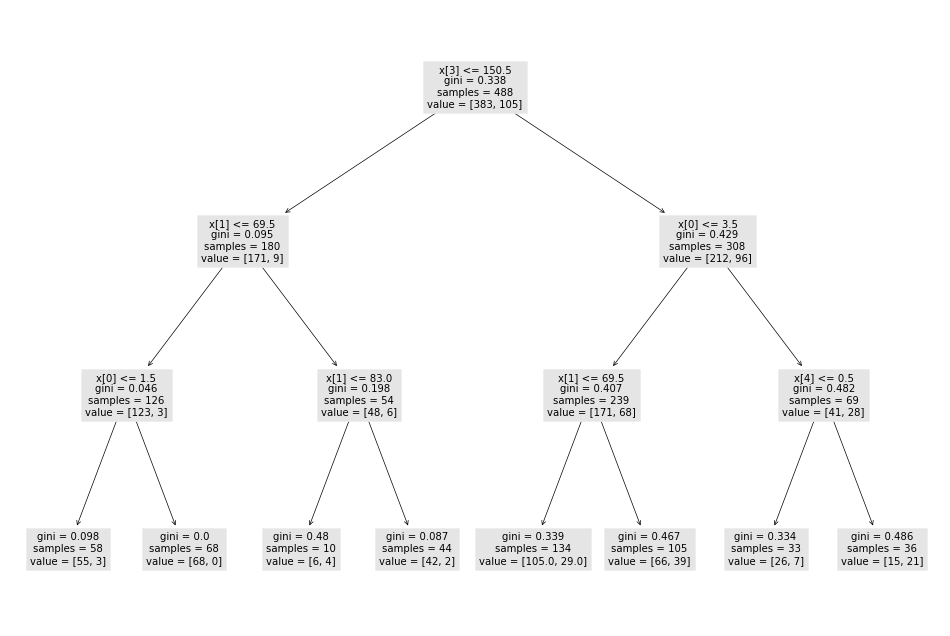

In [99]:
plt.figure(figsize=(12,8))


from sklearn import tree


tree.plot_tree(dt_model.fit(X_train, y_train))

## CONCLUSIÓ 

El rendiment del teu model pot estar limitat per diversos factors com la neteja inadequada de dades, un desbalanceig de classes no gestionat correctament o un model senzill com l'arbre de decisió que no és prou robust per a aquest tipus de dades. Per millorar el rendiment, hauria de revisar bé les dades, aplicar tècniques per equilibrar les classes, i considerar l'ús de models més robustos com Random Forest.

## RANDOM FOREST

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:

X = artists_cartelera.drop(columns=['top'])  # Features
y = artists_cartelera['top']  # Variable objectiu

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)


In [105]:
# Crear el model de Random Forest
rf_model = RandomForestClassifier(random_state=42)



In [106]:

# Configuración de hiperparámetros para búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [107]:
# Usar GridSearchCV para encontrar los mejores parámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)


In [108]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [109]:
# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Mejores parámetros encontrados:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [110]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [111]:
# Mètriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Matriu de confusió
matriu_confusio = confusion_matrix(y_test, y_pred)

print("Mètriques del model Random Forest:")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Matriz de Confusión:\n", matriu_confusio)


Mètriques del model Random Forest:
Precisión: 0.5714285714285714
Recall: 0.10256410256410256
F1-Score: 0.17391304347826086
Accuracy: 0.7865168539325843
Matriz de Confusión:
 [[136   3]
 [ 35   4]]


El model té un bon accuracy (78.7%), però el baix recall (10.3%) i F1-score (17.4%) indiquen que no identifica bé la classe d'interès. Potser hi ha un desbalanceig de classes, i caldria ajustar el paràmetre class_weight o aplicar tècniques de sobremostreig.

### Cross validation

In [114]:
# Realizar validación cruzada
cv_scores = cross_val_score(grid_search, X, y, cv=5, scoring='accuracy')  # Cambia 'accuracy' si deseas otra métrica
print(f"Precisión promedio: {np.mean(cv_scores):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Precisión promedio: 0.7890


In [115]:
print(cv_scores)

[0.77952756 0.79527559 0.80314961 0.81102362 0.75590551]


## KNN

#### Definir variables objetivo 


In [118]:
X = artists_cartelera.drop(['top'], axis=1)


y = artists_cartelera['top']

### Dividir los datos en conjunto de train y test 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

### Crear el model k-NN:

In [122]:
knn = KNeighborsClassifier()


####  Definir la graella de paràmetres per a la cerca amb GridSearchCV:

In [124]:
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


#### Crear i entrenar el model amb GridSearchCV:

In [126]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Entrenar el model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

#### Resultats de la cerca de paràmetres:

In [128]:
print("Millors paràmetres:", grid_search.best_params_)


Millors paràmetres: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}


#### Avaluar el model:

In [130]:
# Fer prediccions amb el millor model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Avaluar la precisió
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7558139534883721


In [131]:
matriu_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", matriu_confusion)

Matriz de Confusión:
 [[127   6]
 [ 36   3]]


In [132]:
# Cálculo de las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Precisión: 0.3333333333333333
Recall: 0.07692307692307693
F1-Score: 0.125
Accuracy: 0.7558139534883721


El model té un accuracy de 76%, però un recall baix (8%) i una precisió de 33%, indicant que no està identificant bé la classe positiva. Això pot ser degut a un desbalanceig de les classes. Prova d'ajustar el nombre de veïns i utilitzar pesos de classe equilibrats.

In [134]:
# Fer prediccions sobre el conjunt d'entrenament
y_train_pred = best_knn.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

# Fer prediccions sobre el conjunt de test
y_test_pred = best_knn.predict(X_test)

# Calcular la precisió sobre el conjunt de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.7840172786177105
0.7558139534883721


No observem cap sobreajust

## Resultats finals

#### decision tree- 
Precisión: 0.6153846153846154
Recall: 0.2222222222222222
F1-Score: 0.32653061224489793
Accuracy: 0.7755102040816326

#### decision-tree optimized
Precisión: 0.6
Recall: 0.25
F1-Score: 0.35294117647058826
Accuracy: 0.7755102040816326

#### random forest
Precisión: 0.5714285714285714
Recall: 0.10256410256410256
F1-Score: 0.17391304347826086
Accuracy: 0.7865168539325843

#### KNN
Precisión: 0.3333333333333333
Recall: 0.07692307692307693
F1-Score: 0.125
Accuracy: 0.7558139534883721

## Visualització Roc

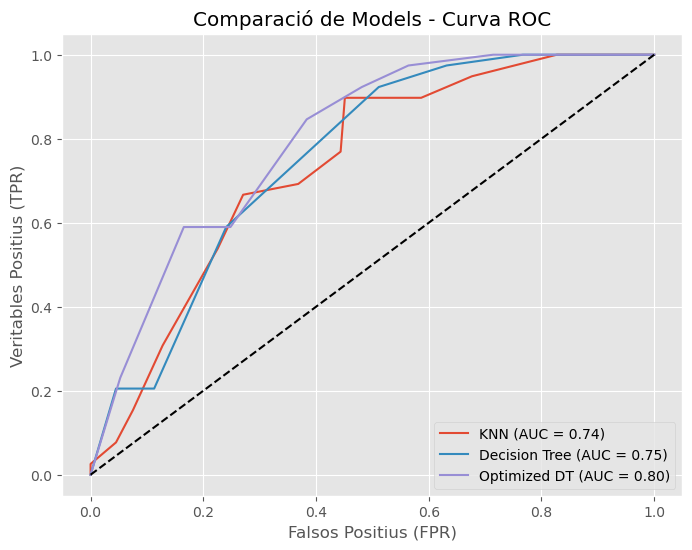

In [139]:
# Calcular les probabilitats per la classe positiva per cada model
knn_probs = best_knn.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
best_dt_probs = best_dt_model.predict_proba(X_test)[:, 1]
rf_probs = best_rf.predict_proba(X_test)[:, 1]

# Calcular les FPR i TPR per cada model
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_test, best_dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Calcular l'AUC per a cada model
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Crear la gràfica de la corba ROC
plt.figure(figsize=(8, 6))

# Traçar les corbes ROC
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_best_dt, tpr_best_dt, label=f'Optimized DT (AUC = {roc_auc_best_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Línia diagonal (classificador aleatori)
plt.plot([0, 1], [0, 1], 'k--')

# Títol i etiquetes
plt.title('Comparació de Models - Curva ROC')
plt.xlabel('Falsos Positius (FPR)')
plt.ylabel('Veritables Positius (TPR)')
plt.legend(loc='lower right')

# Mostrar el gràfic
plt.show()

L'Optimized Decision Tree (AUC = 0.80) és el model amb millor rendiment, seguit de prop pel Decision Tree i Random Forest (AUC = 0.75). El KNN (AUC = 0.74) és el que presenta un rendiment inferior.

## CONCLUSIÓ FINAL

Tot i que els models tenen una precisió superior al 75%, prediuen millor la classe 0 que la classe 1, probablement a causa de l'imbalanç de les classes. Tot i els esforços per equilibrar les dades, els models no són prou eficaços per predir la classe 1, possiblement per errors en la neteja de les dades o per la manca de característiques rellevants. Si hagués de triar un model, seleccionaria l'arbre de decisió optimitzat, ja que és el més eficaç per predir si una cançó estarà al top 1, segons les mètriques i la curva ROC.